<a href="https://colab.research.google.com/github/Jhansipothabattula/Data_Science/blob/main/Day194.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disease Prediction using ML Algorithms

In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


Dataset Sample:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Logistic Regression Accuracy: 0.81
Random Forest Accuracy: 1.00

Best Model Metrics:
Accuracy Score: 1.0
Classification Report:
          

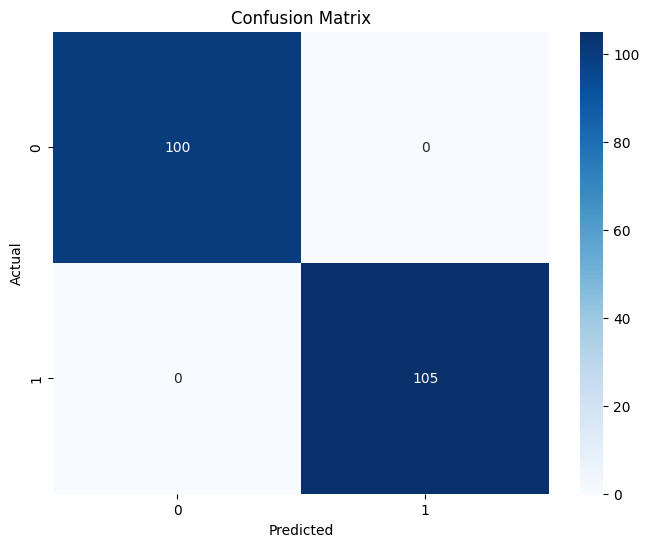


Prediction for New Data: At Risk of Heart Disease


In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Step 1: Load Dataset
df = pd.read_csv('heart.csv')

# Display first few rows
print("Dataset Sample:")
print(df.head())

# Step 2: Data Preprocessing
# Handle missing values (if any)
print("\nMissing Values:\n", df.isnull().sum())

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['target']

# Step 3: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train Multiple ML Models

# 1. Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Step 5: Evaluate the Best Model
best_model = rf_model if rf_accuracy > log_accuracy else log_model
best_preds = rf_preds if rf_accuracy > log_accuracy else log_preds

print("\nBest Model Metrics:")
print("Accuracy Score:", accuracy_score(y_test, best_preds))
print("Classification Report:\n", classification_report(y_test, best_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_preds))

# Step 6: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Make Predictions on New Data
new_data = pd.DataFrame({
    'age': [45],
    'sex': [1],
    'cp': [2],
    'trestbps': [130],
    'chol': [230],
    'fbs': [0],
    'restecg': [1],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [0.5],
    'slope': [2],
    'ca': [0],
    'thal': [2]
})

# Scale new data
new_data_scaled = scaler.transform(new_data)
prediction = best_model.predict(new_data_scaled)
print("\nPrediction for New Data:", "At Risk of Heart Disease" if prediction[0] == 1 else "No Heart Disease")